In [129]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import xgboost as xgb

import math

import warnings
warnings.filterwarnings('ignore')

## Load and Clean Data

In [130]:
df = pd.read_csv("co2_emissions_from_agri.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [131]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

In [133]:
df.describe()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [134]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
On-farm_energy_use                  956


In [135]:
df_original = df.copy()

In [136]:
df_check = df[
    [
        "Savanna_fires",
        "Forest_fires",
        "Crop_Residues",
        "Forestland",
        "Net_Forest_conversion",
        "Food_Household_Consumption",
        "IPPU",
        "Manure_applied_to_Soils",
        "Manure_Management",
        "On-farm_energy_use",
    ]
]

### Handling missing data:
- Mean-It is preferred if data is numeric and not skewed.
-
Median-It is preferred if data is numeric and skewed
-
Mode-It is preferred if the data is a string(object) or numeric.

array([[<Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>],
       [<Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>,
        <Axes: title={'center': 'Food_Household_Consumption'}>],
       [<Axes: title={'center': 'IPPU'}>,
        <Axes: title={'center': 'Manure_applied_to_Soils'}>,
        <Axes: title={'center': 'Manure_Management'}>],
       [<Axes: title={'center': 'On-farm_energy_use'}>, <Axes: >,
        <Axes: >]], dtype=object)

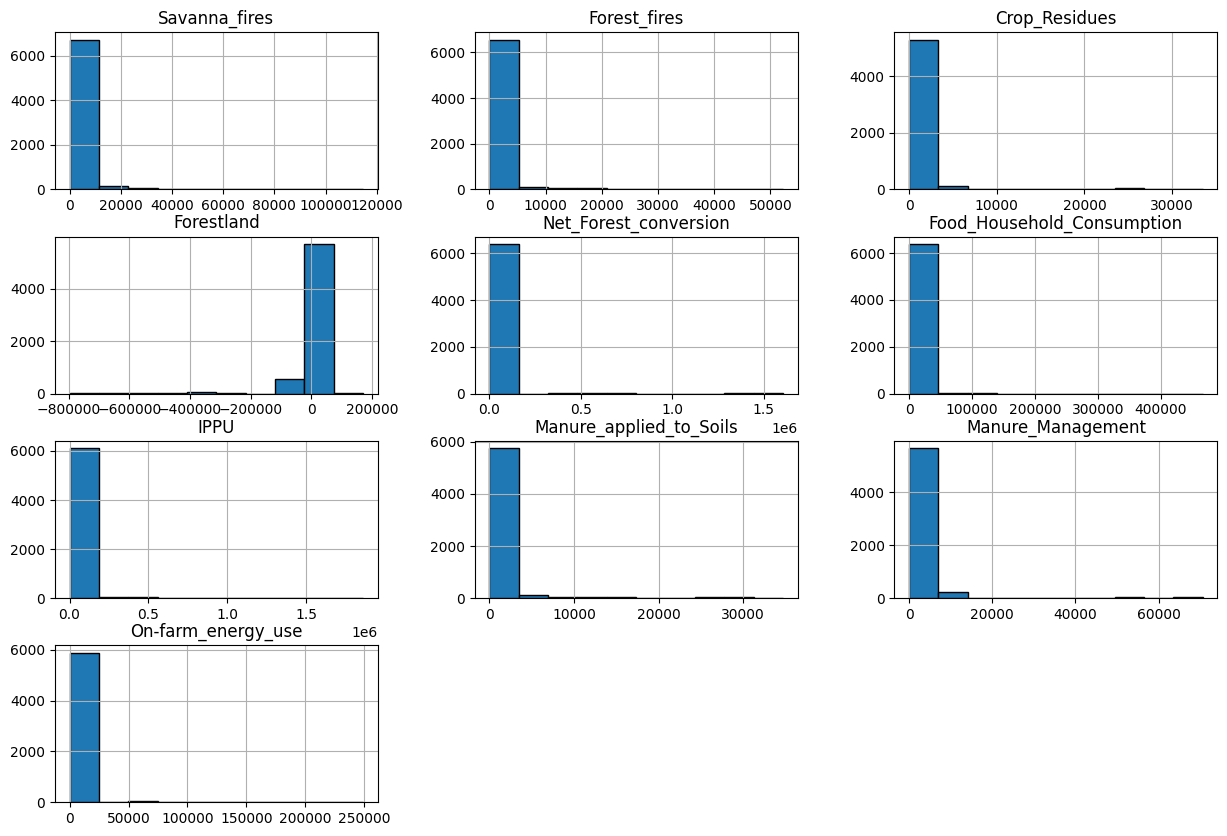

In [137]:
df_check.hist(bins=10, figsize=(15, 10), edgecolor="black")

In [138]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

# Fill NaN values in numeric columns with the mean of each column
numeric_cols_filled = numeric_cols.fillna(numeric_cols.median())

df_filled = pd.concat([non_numeric_cols, numeric_cols_filled], axis=1)

In [139]:
df = df_filled.copy()
df.isna().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
On-farm_energy_use                 0
Rural_population                   0
Urban_population                   0
T

## Exploratory Data Analysis

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna_fires,6965.0,1.183109e+03,5.235194e+03,0.000000,0.000000,1.651850e+00,1.083617e+02,1.146164e+05
Forest_fires,6965.0,9.070341e+02,3.696660e+03,0.000000,0.000000,5.179000e-01,6.123720e+01,5.222763e+04
Crop_Residues,6965.0,8.202187e+02,3.330079e+03,0.000200,25.360100,1.036982e+02,2.647180e+02,3.349007e+04
Rice_Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained_organic_soils_(CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides_Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food_Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6965.0,-1.657081e+04,7.901397e+04,-797183.079000,-2299.387200,-6.292000e+01,0.000000e+00,1.711211e+05
Net_Forest_conversion,6965.0,1.636262e+04,9.761518e+04,0.000000,0.000000,4.444000e+01,3.830905e+03,1.605106e+06


In [141]:
df.drop_duplicates()

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,141.0963,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,141.0963,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,141.0963,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,141.0963,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,141.0963,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [142]:
df["Drained_organic_soils_(CO2)"].value_counts()

Drained_organic_soils_(CO2)
0.0000        3853
0.4596          29
235.9155        29
8.3403          28
0.8185          24
              ... 
5602.6975        1
5602.2051        1
5602.0383        1
5659.5934        1
14566.6658       1
Name: count, Length: 2147, dtype: int64

In [143]:
df["Fires_in_organic_soils"].value_counts()

Fires_in_organic_soils
0.000000         6656
0.058149          155
3521.612200         6
392.285100          6
9251.057700         6
                 ... 
523099.074600       1
187100.934800       1
217996.982200       1
206751.929000       1
497.465400          1
Name: count, Length: 126, dtype: int64

In [144]:
df["Fires_in_humid_tropical_forests"].value_counts()

Fires_in_humid_tropical_forests
0.0000        4632
0.1388          19
0.1389          12
1.8252          12
0.8328          10
              ... 
597.2093         1
604.5683         1
599.5691         1
304.7160         1
19808.3477       1
Name: count, Length: 1736, dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Savanna_fires'}>,
        <Axes: title={'center': 'Forest_fires'}>,
        <Axes: title={'center': 'Crop_Residues'}>,
        <Axes: title={'center': 'Rice_Cultivation'}>],
       [<Axes: title={'center': 'Drained_organic_soils_(CO2)'}>,
        <Axes: title={'center': 'Pesticides_Manufacturing'}>,
        <Axes: title={'center': 'Food_Transport'}>,
        <Axes: title={'center': 'Forestland'}>,
        <Axes: title={'center': 'Net_Forest_conversion'}>],
       [<Axes: title={'center': 'Food_Household_Consumption'}>,
        <Axes: title={'center': 'Food_Retail'}>,
        <Axes: title={'center': 'On-farm_Electricity_Use'}>,
        <Axes: title={'center': 'Food_Packaging'}>,
        <Axes: title={'center': 'Agrifood_Systems_Waste_Disposal'}>],
       [<Axes: title={'center': 'Food_Processing'}>,
        <Axes: title={'center': 'Fertilizers_Manufacturing'}>,
        <Axes: title={'center': 'IPPU'}>,
        <A

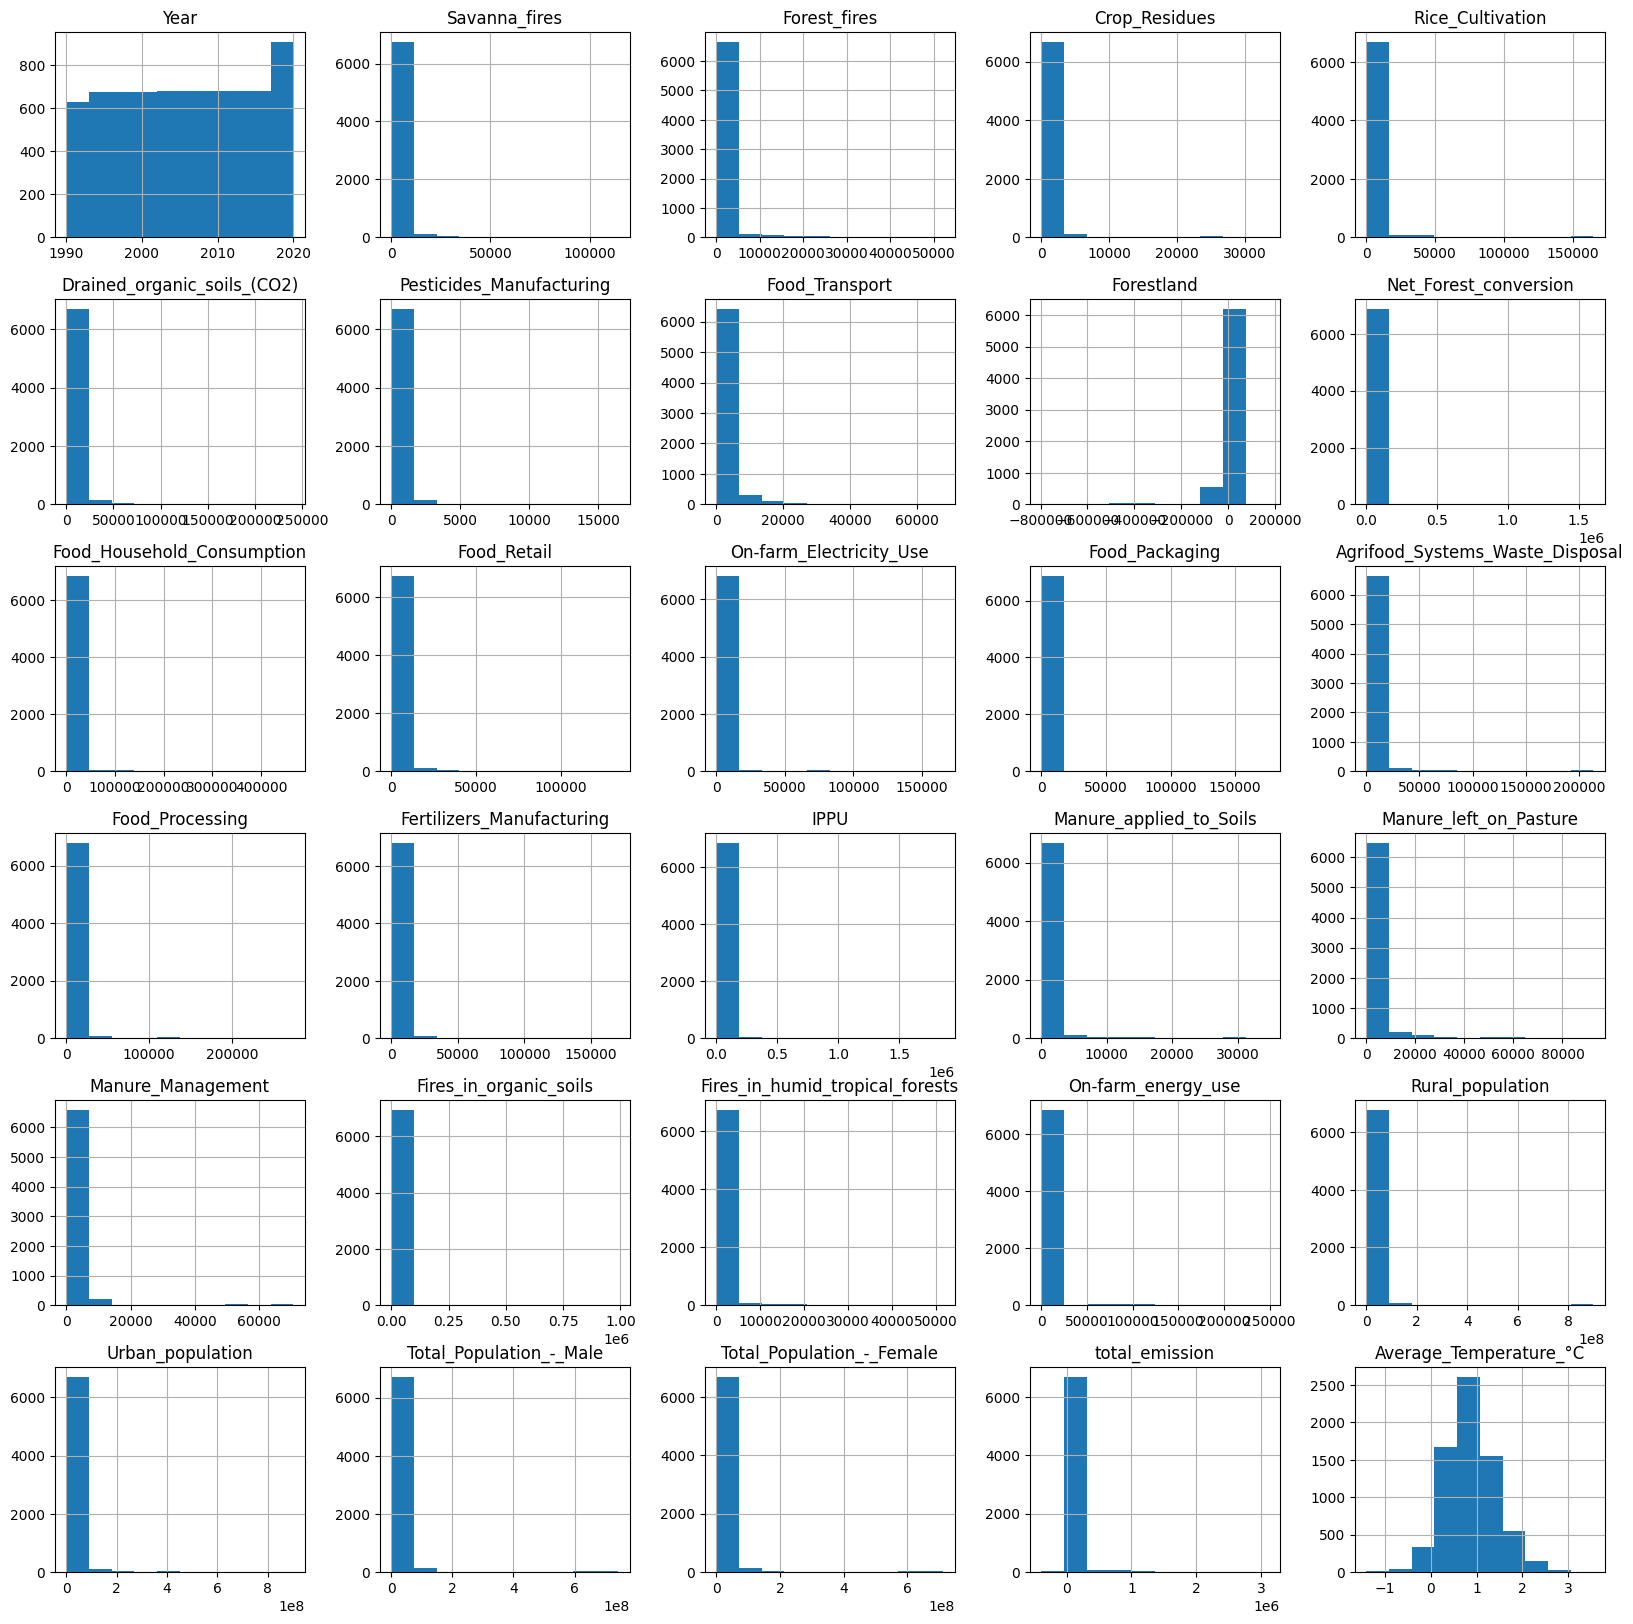

In [145]:
df.hist(figsize=(20, 20))

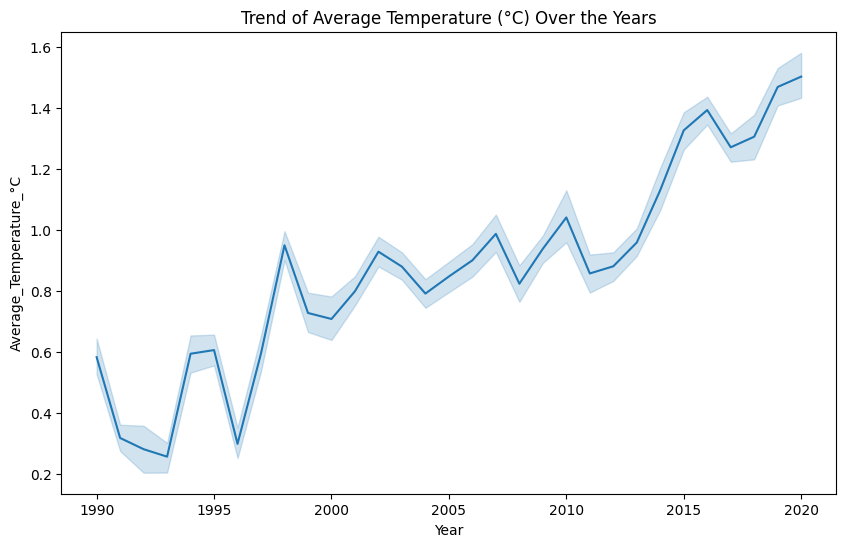

In [146]:
def line_graph(df, x, y, title):
    """
    The function receives a dataframe as the first argument followed by the independet variable x and column Y and
    the title of the graph to be plotted, the fuction use these arguments to plot a line graph
    """

    # Time Series Analysis - Trend Analysis
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=df)
    plt.title(title)
    plt.show()


line_graph(
    df,
    "Year",
    "Average_Temperature_°C",
    "Trend of Average Temperature (°C) Over the Years",
)

The graph clearly shows a rise in average temperature from the 1990s to 2020.

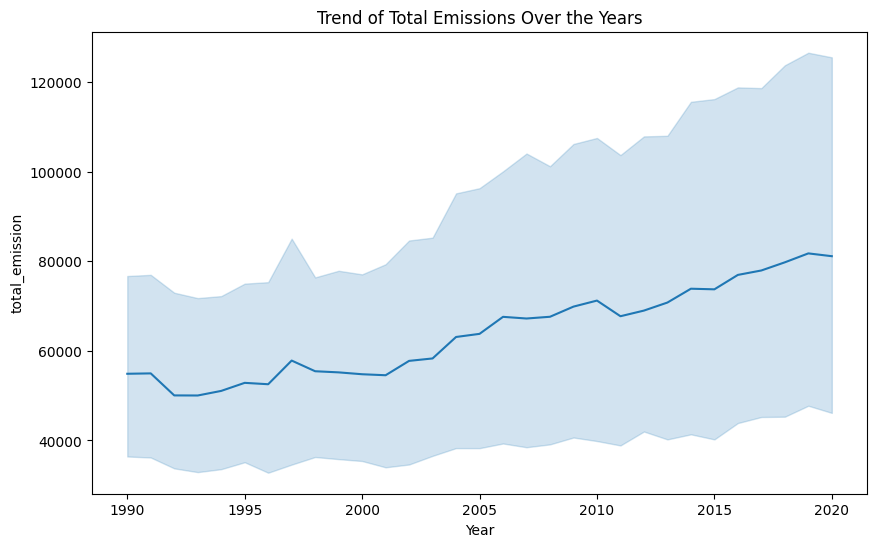

In [147]:
line_graph(df, "Year", "total_emission", "Trend of Total Emissions Over the Years")

The graph leaves no doubt that carbon dioxide emissions have steadily increased linearly over the years.

Correlation with total_emission:
 total_emission                     1.000000
Urban_population                   0.907774
Agrifood_Systems_Waste_Disposal    0.879840
Food_Household_Consumption         0.861937
IPPU                               0.851667
Manure_applied_to_Soils            0.845955
Food_Packaging                     0.842555
Crop_Residues                      0.836232
Total_Population_-_Female          0.823163
Total_Population_-_Male            0.818163
Fertilizers_Manufacturing          0.816064
Food_Processing                    0.814844
Manure_Management                  0.805169
On-farm_energy_use                 0.796253
Rice_Cultivation                   0.756638
Food_Retail                        0.755753
Manure_left_on_Pasture             0.755672
Pesticides_Manufacturing           0.746777
Rural_population                   0.705162
On-farm_Electricity_Use            0.692060
Food_Transport                     0.657877
Net_Forest_conversion              0.43191

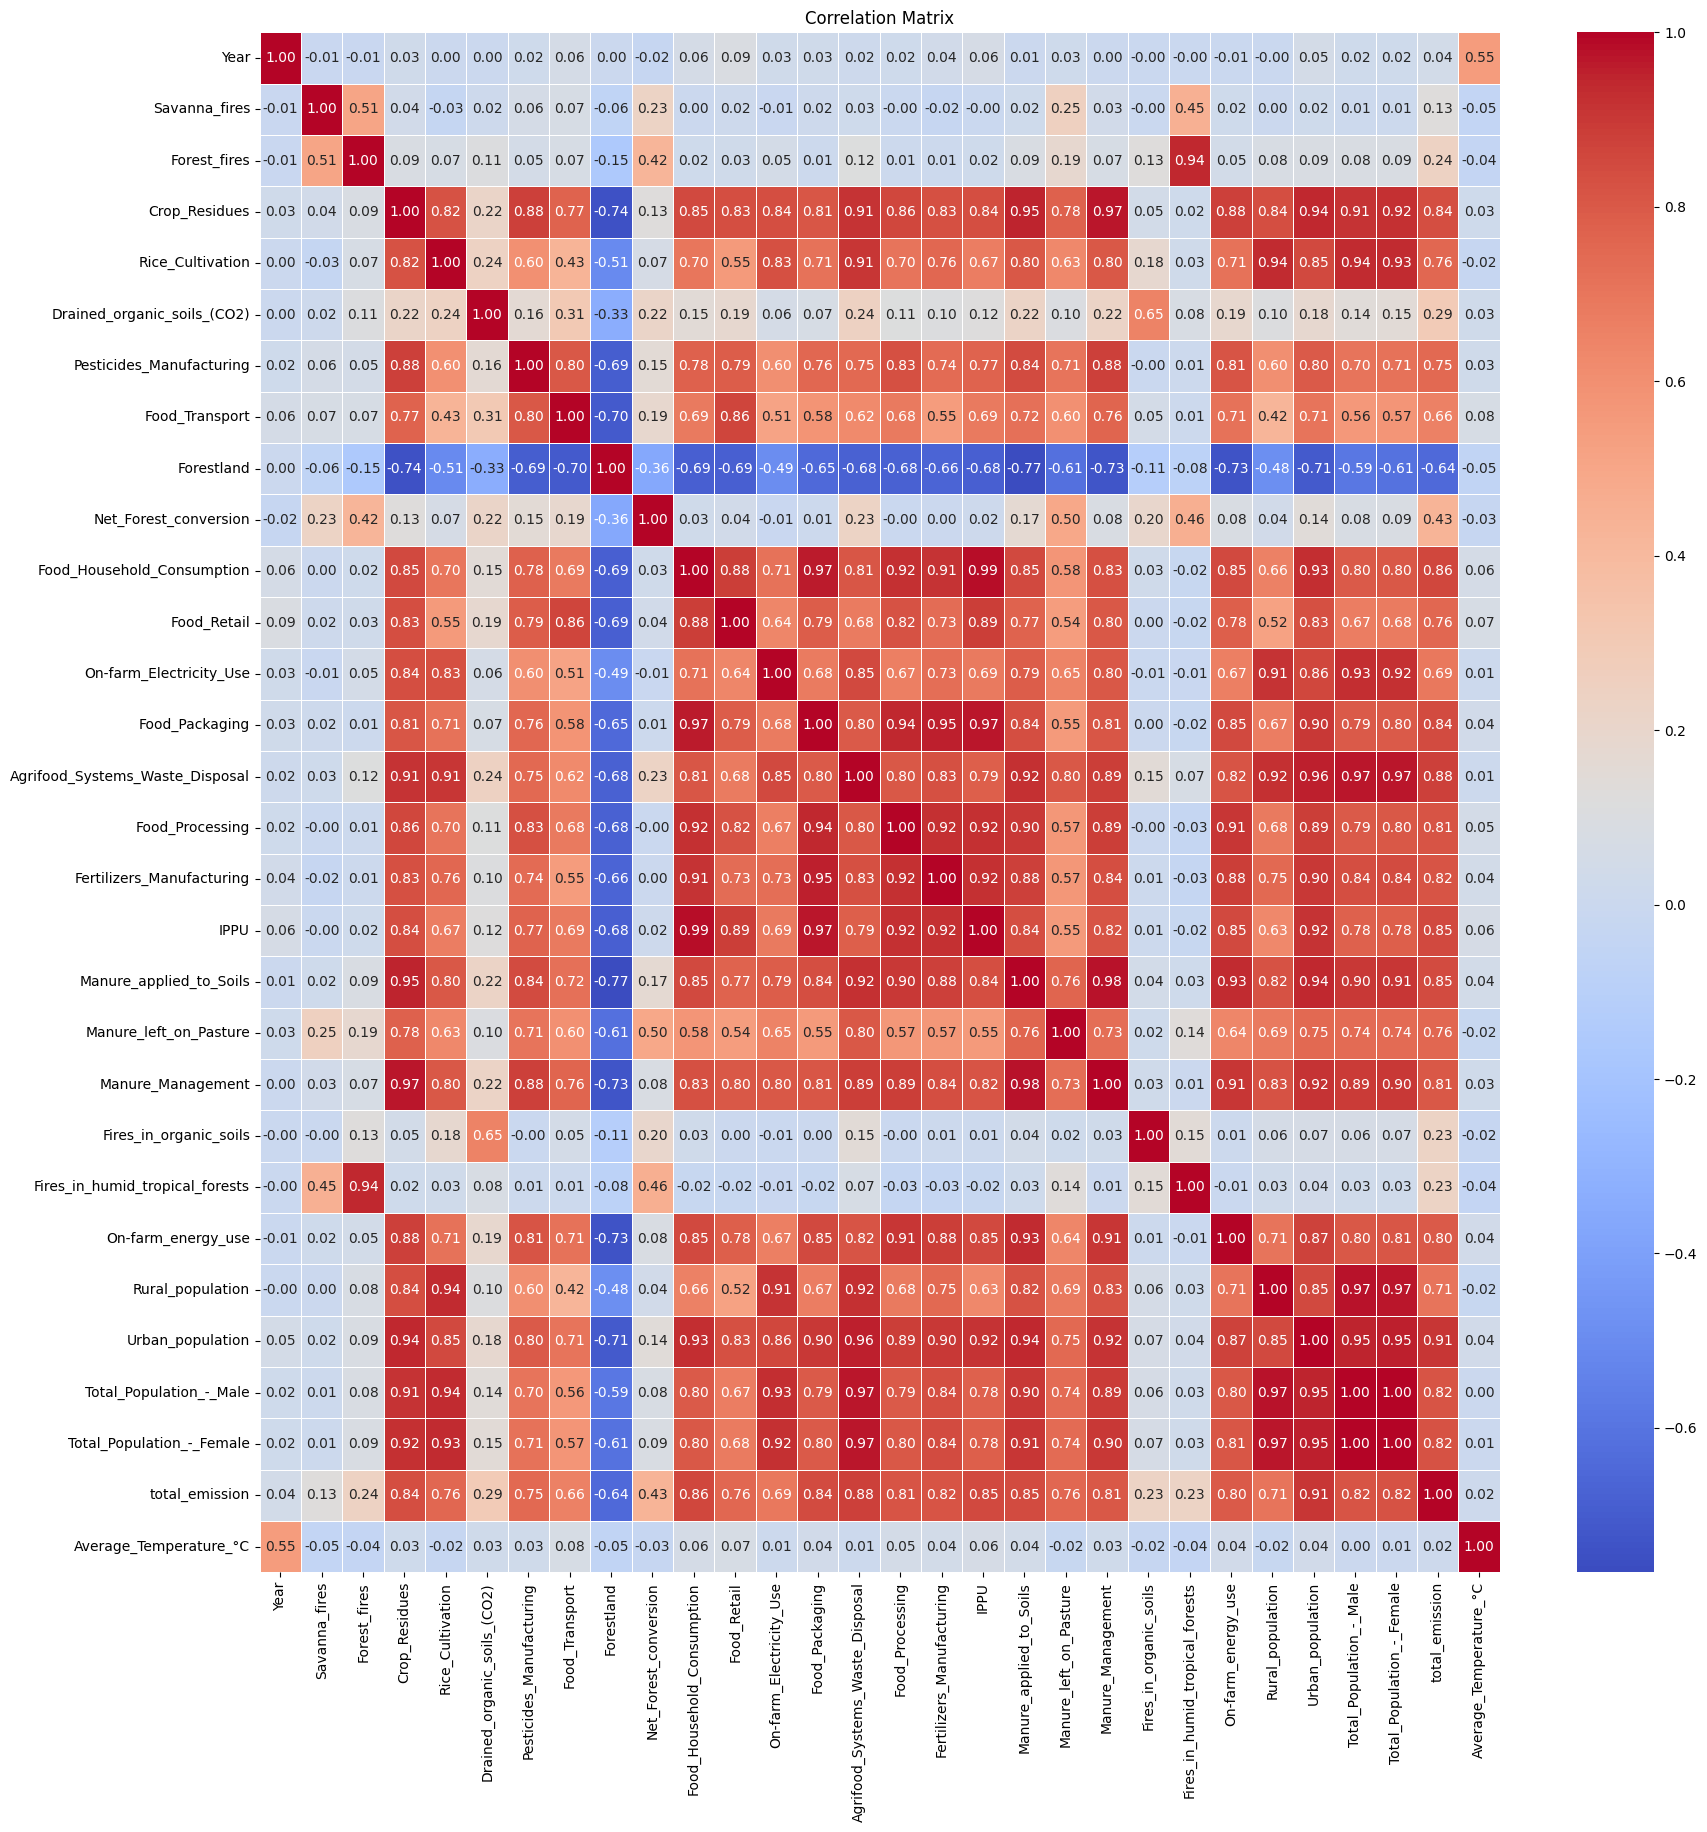

In [148]:
corr = df.drop("Area", axis=1).corr()
print(
    "Correlation with total_emission:\n",
    corr["total_emission"].sort_values(ascending=False),
)



# Plot the correlation matrix as a heatmap


plt.figure(figsize=(20, 20))


sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Correlation Matrix")


plt.show()

From the heat map, it is evident that there is a multilinear correlation between many variables, the squares appering in dark blue indicate a negative correlation whiile the squares appearing in dark red or meron indicate positive correlation. multilinear correlation is not good for a reggration model.  


let's explore the total emissions per year.

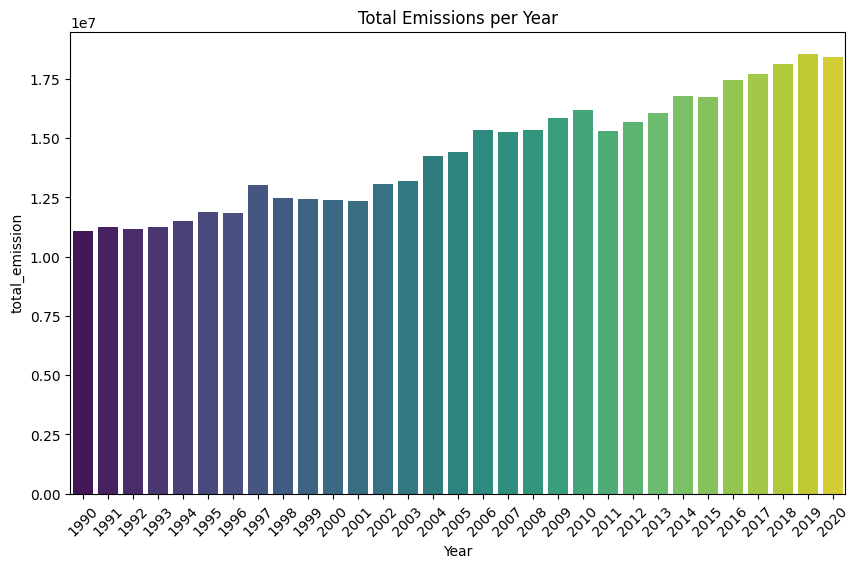

In [149]:
def bar_graph_plots(df, title, x, y):

    emissions_per_year = df.groupby(x)[y].sum().reset_index()

    # Plot the data using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=emissions_per_year, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title)


bar_graph_plots(df, "Total Emissions per Year", "Year", "total_emission")

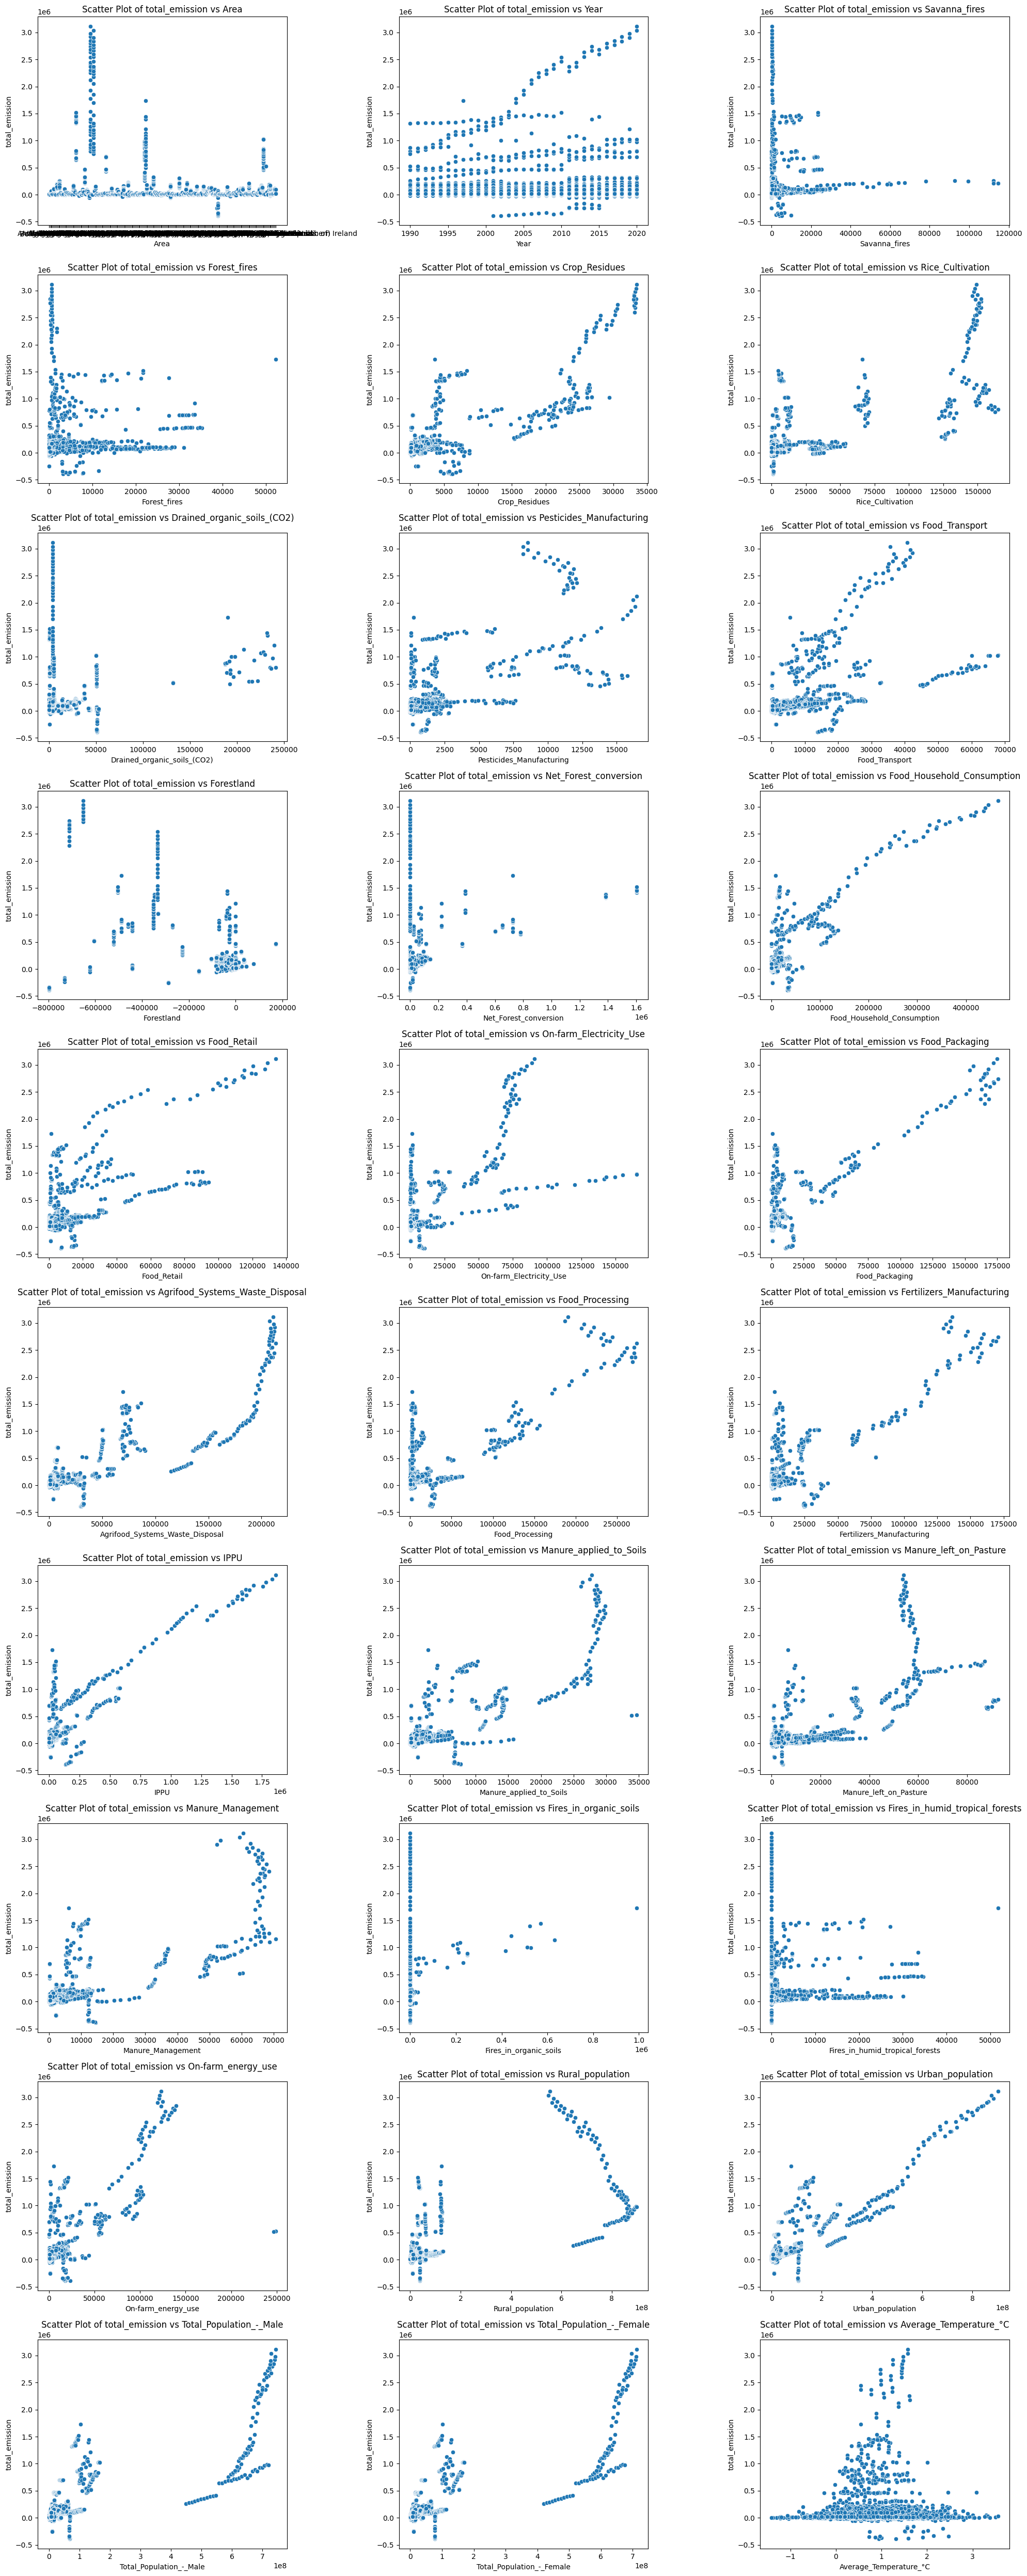

In [150]:
target_variable = "total_emission"
#non_num = "Area"

features = df.columns.drop([target_variable])
num_features = len(features)

# the number of rows and columns for the subplots
num_cols = 3  # e number of columns in the grid
num_rows = math.ceil(num_features / num_cols)

#  subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y=target_variable, data=df, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of {target_variable} vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_variable)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

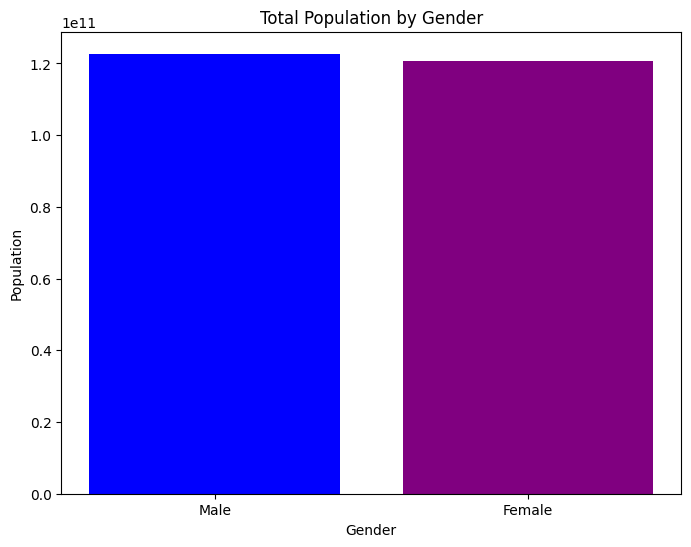

In [151]:
total_male_population = df['Total_Population_-_Male'].sum()
total_female_population = df['Total_Population_-_Female'].sum()

# Create a DataFrame for plotting
data = {
    'Gender': ['Male', 'Female'],
    'Population': [total_male_population, total_female_population]
}
population_df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(population_df['Gender'], population_df['Population'], color=['blue', 'purple'])
plt.title('Total Population by Gender')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.show()

## Preprocessing

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
X = df.drop(['total_emission','Area'], axis= 1)
y = df['total_emission']

VIF (Variance Inflation Factor) was used for feature selection.
Why?:
- It helps identify multicollinearity among features. Multicollinearity inflates the variance of coefficient estimates.
- High VIF values indicate strong correlation among features. Features with high VIF may be redundant.
- Removing redundant features improves model interpretability. It reduces the risk of overfitting.


VIF is a useful tool for identifying and removing redundant features.

In [154]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

e.g Variables with extremely high VIFs:

- Total_Population_-_Female (10920.85)
- Total_Population_-_Male (9806.04)
- Urban_population (854.89)
- Rural_population (1169.54)

These variables are highly collinear with each other and likely with other population-related variables. Including all these in the model would cause severe multicollinearity issues.


In [155]:
calc_vif(X)

,variables,VIF
0,Year,4.399506
1,Savanna_fires,2.003509
2,Forest_fires,12.393222
3,Crop_Residues,57.494443
4,Rice_Cultivation,15.809597
5,Drained_organic_soils_(CO2),3.170557
6,Pesticides_Manufacturing,11.489602
7,Food_Transport,16.470861
8,Forestland,5.944474
9,Net_Forest_conversion,4.079038


Drop features with High VIF

In [156]:
df_new = df.drop(columns=['Total_Population_-_Female','Total_Population_-_Male','Urban_population','Rural_population','Manure_Management',
                        'Manure_applied_to_Soils','IPPU','Agrifood_Systems_Waste_Disposal','Food_Household_Consumption','Crop_Residues',
                        'Fertilizers_Manufacturing','Average_Temperature_°C','On-farm_Electricity_Use','Fires_in_humid_tropical_forests'])

Data Encoding:

In [157]:
df_dumies = pd.get_dummies(df_new, drop_first= True)
print(df_dumies.shape)

df_1 = df_dumies.copy()

(6965, 251)


Split dataset

In [158]:
X = df_1.drop('total_emission', axis= 1)
y = df_1['total_emission']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                    random_state=42)

## Model Building

### **Extreme Gradient Boosting(XGBoost)**

**Pipeline**: We use Pipeline from scikit-learn to combine the StandardScaler and the XGBoost model. This ensures that scaling is applied as part of the cross-validation process, preventing data leakage.

In [159]:
# Define the model and the scaler in a pipeline
pipeline_xg = Pipeline([
    ('scaler', StandardScaler()),     # Step 1: Scaling
    ('xgb', xgb.XGBRegressor())       # Step 2: XGBoost Model
])

Why XGBoost?:
- It utilizes decision trees as base learners and employs regularization techniques to enhance model generalization.
-  Itncludes built-in regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization, which help prevent overfitting and improve generalization performance.
- Also Known for its computational efficiency, feature importance analysis, and handling of missing values



**XGBoost Hyperparameter optimization:**

In [160]:
param_dist_xg = {
    'xgb__learning_rate' : uniform(0.01, 0.1),
    'xgb__max_depth': randint(3, 10),
    'xgb__min_child_weight': randint(1, 6),
    'xgb__subsample': uniform(0.5, 1.0),
    'xgb__colsample_bytree': uniform(0.5, 1.0),
    'xgb__n_estimators': randint(100, 500)
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=pipeline_xg, param_distributions=param_dist_xg,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)  # n_itter =50/40 :RMSE:  18177.7186755697 R-squared:  0.9952231823705947

random_search.fit(X_train, y_train)
# Get the best parameters
best_params_xg = random_search.best_params_

print("Best parameters found: ", best_params_xg)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'xgb__colsample_bytree': 0.6822360877880623, 'xgb__learning_rate': 0.08553614103176525, 'xgb__max_depth': 8, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 359, 'xgb__subsample': 0.684854455525527}


Train Model and Predict

In [161]:
# Train the final model using the best parameters
final_XGB_model = random_search.best_estimator_ # OLD: RMSE:  40958.861587016196 #R-squared:  0.9757475476519069

final_XGB_model.fit(X_train, y_train)

y_pred_xg = final_XGB_model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_xg)))
print("R-squared: ", r2_score(y_test,y_pred_xg))

RMSE:  18177.7186755697
R-squared:  0.9952231823705947


Plot Predictions

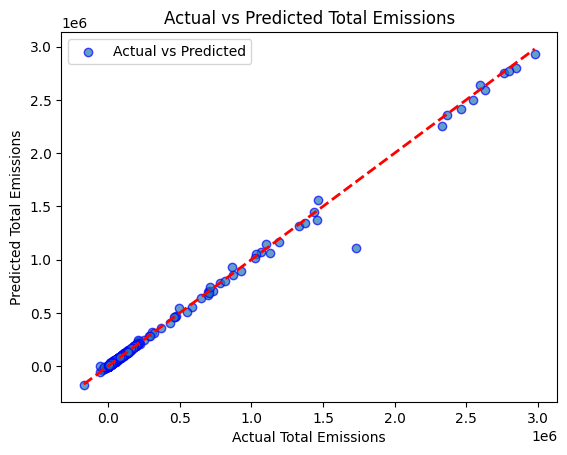

In [162]:
# Plot the results
plt.scatter(y_test, y_pred_xg, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Total Emissions')
plt.ylabel('Predicted Total Emissions')
plt.title('Actual vs Predicted Total Emissions')
plt.legend()
plt.show()

Examine feature importances

In [163]:

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': final_XGB_model['xgb'].feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                                   Feature  Importance
114                         Area_Indonesia    0.260815
42                             Area_Brazil    0.196176
238          Area_United States of America    0.158768
12                  Manure_left_on_Pasture    0.073437
73   Area_Democratic Republic of the Congo    0.043969
..                                     ...         ...
59                   Area_China, Macao SAR    0.000000
117                           Area_Ireland    0.000000
118                       Area_Isle of Man    0.000000
175                             Area_Palau    0.000000
196                             Area_Samoa    0.000000

[250 rows x 2 columns]


In [164]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_xg,'Difference':y_test-y_pred_xg})
pred_df.sort_values('Difference',ascending= False)

,Actual Value,Predicted Value,Difference
2997,1.732859e+06,1.112688e+06,620170.62240
847,1.461225e+06,1.375047e+06,86177.34810
1406,2.331396e+06,2.254904e+06,76491.24140
3006,1.132675e+06,1.057808e+06,74867.51960
1410,2.548969e+06,2.499058e+06,49911.01000
...,...,...,...
1393,1.103074e+06,1.145125e+06,-42051.38310
3001,4.964128e+05,5.441312e+05,-47718.38860
5257,-5.795213e+04,1.503632e+02,-58102.49799
2984,8.639638e+05,9.296457e+05,-65681.85890


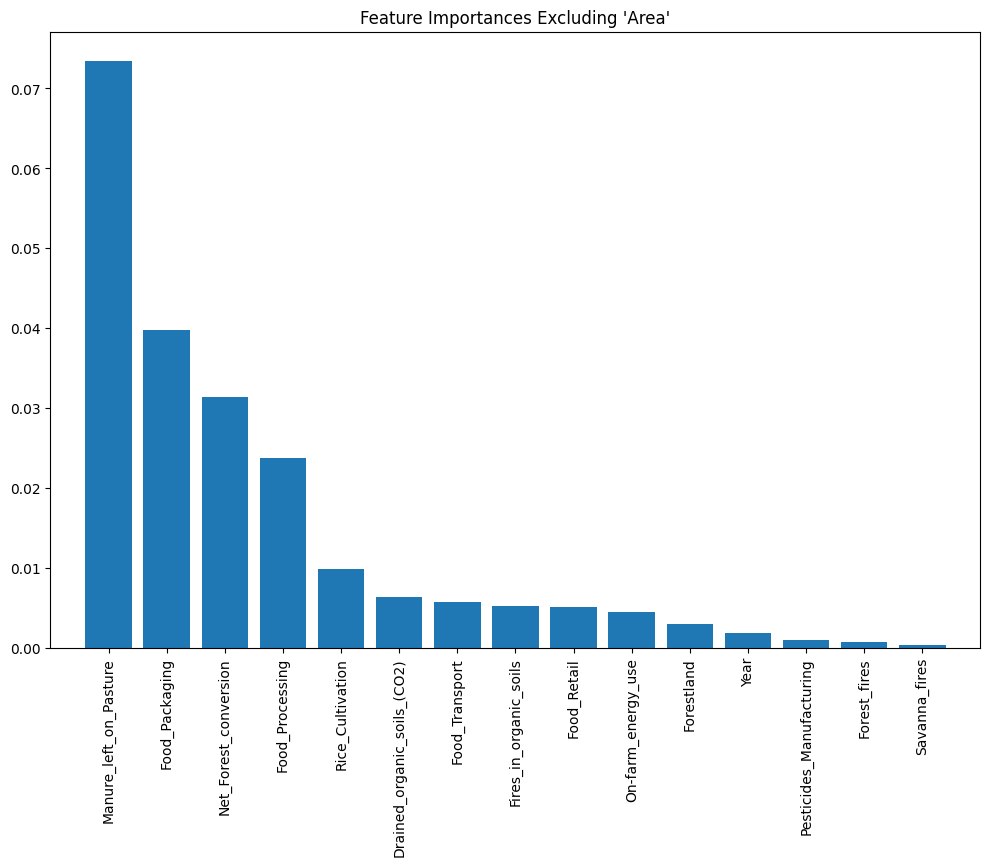

In [165]:
importances = final_XGB_model['xgb'].feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
# Filter out features that start with "Area"
filtered_indices = [i for i, name in enumerate(feature_names) if not name.startswith("Area")]
filtered_importances = importances[filtered_indices]
filtered_feature_names = feature_names[filtered_indices]

# Sort the remaining features by their importances
sorted_indices = np.argsort(filtered_importances)[::-1]

# Plot the feature importances excluding those that start with "Area"
plt.figure(figsize=(12, 8))
plt.title("Feature Importances Excluding 'Area'")
plt.bar(range(len(filtered_feature_names)), filtered_importances[sorted_indices], align="center")
plt.xticks(range(len(filtered_feature_names)), filtered_feature_names[sorted_indices], rotation=90)
plt.xlim([-1, len(filtered_feature_names)])
plt.show()


A residual plot provides us  a visual way to assess how well our regression model fits our data.

Our Residual Plot shows no pattern, that is, the points are randomly dispersed,we can conclude that a linear model is an appropriate model.

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg - y_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Total Emissions')
plt.ylabel('Residuals')
plt.title('XGBoost Residual Plot')
plt.show()

### **Bagging regressor**

Why Bagging:

- BaggingRegressor is a machine learning ensemble method that combines the predictions from multiple base estimators, typically decision trees, to improve overall prediction accuracy.

- Reduction of Variance: BaggingRegressor reduces the variance of the model by averaging the predictions of multiple base estimators trained on different subsets of the training data. This helps to mitigate overfitting and improve the model's generalization performance.
- Robustness to Outliers and Noise: By training multiple base estimators on different subsets of the data


In [167]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# Define the model and the scaler in a pipeline
pipeline_bag = Pipeline([
    ('scaler', StandardScaler()),     # Step 1: Scaling
    ('bagging', BaggingRegressor(base_estimator=DecisionTreeRegressor()))       # Step 2: XGBoost Model
])

In [168]:
param_dist_bag = {
    'bagging__n_estimators': randint(10, 200),       # Number of base estimators in the ensemble
    'bagging__max_samples': uniform(0.5, 0.5),       # Fraction of samples to draw from X to train each base estimator
    'bagging__max_features': uniform(0.5, 0.5),      # Fraction of features to draw from X to train each base estimator
    'bagging__base_estimator__max_depth': randint(3, 20),  # Maximum depth of the base estimator (DecisionTreeRegressor)
    'bagging__base_estimator__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'bagging__base_estimator__min_samples_leaf': randint(1, 20)    # Minimum number of samples required to be at a leaf node
}

            # Set up the randomized search with cross-validation
random_search_bag = RandomizedSearchCV(estimator=pipeline_bag, param_distributions=param_dist_bag,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)  # n_itter =50/40 :RMSE:  18177.7186755697 R-squared:  0.9952231823705947

random_search_bag.fit(X_train, y_train)
# Get the best parameters
best_params_bag = random_search_bag.best_params_

print("Best parameters found: ", best_params_bag)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'bagging__base_estimator__max_depth': 11, 'bagging__base_estimator__min_samples_leaf': 1, 'bagging__base_estimator__min_samples_split': 9, 'bagging__max_features': 0.6933676731502687, 'bagging__max_samples': 0.9683649943683672, 'bagging__n_estimators': 138}


In [169]:
# Train the final model using the best parameters
final_bag_model = random_search_bag.best_estimator_  # OLD: RMSE:  40958.861587016196 #R-squared:  0.9757475476519069

final_bag_model.fit(X_train, y_train)

y_pred_bag  = final_bag_model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("R-squared: ", r2_score(y_test,y_pred_bag))

RMSE:  26763.728737244837
R-squared:  0.9896449274932011


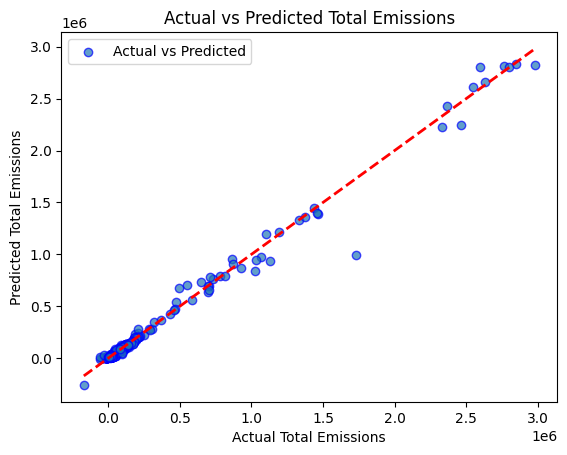

In [185]:
# Plot the results
plt.scatter(y_test, y_pred_bag, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Total Emissions')
plt.ylabel('Predicted Total Emissions')
plt.title('Actual vs Predicted Total Emissions')
plt.legend()
plt.show()

In [171]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_bag,'Difference':y_test-y_pred_bag})
pred_df.sort_values('Difference',ascending= False)

,Actual Value,Predicted Value,Difference
2997,1.732859e+06,9.951190e+05,737740.135199
1407,2.465681e+06,2.242817e+06,222863.739140
3006,1.132675e+06,9.404361e+05,192239.069870
6621,1.023694e+06,8.415438e+05,182150.587064
1323,2.978585e+06,2.819399e+06,159186.736033
...,...,...,...
2984,8.639638e+05,9.536773e+05,-89713.430861
1393,1.103074e+06,1.195793e+06,-92718.779812
3010,5.498586e+05,7.020466e+05,-152187.927836
3001,4.964128e+05,6.776440e+05,-181231.167179


Our Residual Plot shows no pattern, that is, the points are randomly dispersed,we can conclude that a linear model is an appropriate model.

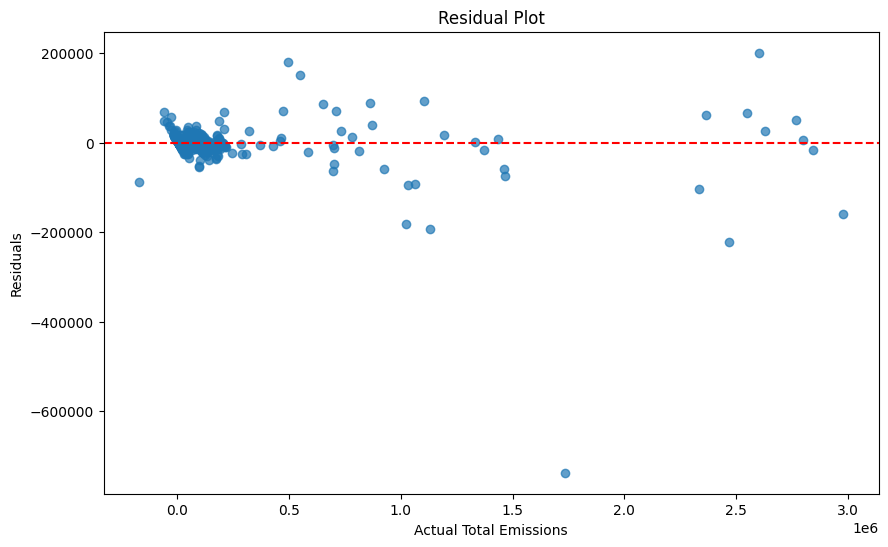

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bag - y_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Total Emissions')
plt.ylabel('Residuals')
plt.title('Bagging Residual Plot')
plt.show()

### **Stacking Ensemble Models**

Why Stacking?

- Stacking is an ensemble learning technique that combines multiple base models, or learners, to improve predictive performance. In stacking, the predictions of individual base models are used as features to train a meta-model, also known as a blender or a meta-learner

- Improved Predictive Performance: Stacking can often lead to better predictive performance compared to individual base models.

- Reduction of Overfitting: Stacking helps mitigate overfitting by combining predictions from multiple models.

- Model Flexibility: Stacking allows for flexibility in model selection. You can choose different types of base models and meta-learners based on the problem at hand.
- Ensemble Diversity:This diversity helps capture different aspects of the data and reduces the risk of model bias.

In [173]:
# Define pipelines for each base estimator
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=42))
])

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

Ridge Regression (pipe_ridge): incorporates L2 regularization to prevent overfitting. It is particularly useful when dealing with multicollinearity in the data and can improve the stability of the stacking model. which is good for our data

In [174]:
# Define the meta-learner
meta_learner_reg = LinearRegression()


# Create the StackingRegressor
s_reg = StackingRegressor(
    estimators=[("LR", pipe_lr), ("DT", pipe_dt), ("Ridge", pipe_ridge)],
    final_estimator=meta_learner_reg
)


In [175]:
# Define the hyperparameter distributions
param_dist_stack = {
    'DT__dt__max_depth': randint(3, 20),
    'DT__dt__min_samples_split': randint(2, 20),
    'DT__dt__min_samples_leaf': randint(1, 20),
    'Ridge__ridge__alpha': uniform(0.1, 10.0)
}

# Set up the randomized search with cross-validation
random_search_stack = RandomizedSearchCV(estimator=s_reg, param_distributions=param_dist_stack,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)

# Fit the model
random_search_stack.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=StackingRegressor(estimators=[('LR',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('lr',
                                                                             LinearRegression())])),
                                                           ('DT',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('dt',
                                                                             DecisionTreeRegressor(random_state=42))])),
                                                           ('Ridge',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('ridge',
                                                                             Ridge())]))],
                                               final_estimator=LinearRegression(...
                                        'DT__dt__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7895ff86e440>,
                                        'DT__dt__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7895ff829f00>,
                                        'Ridge__ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7895ff829810>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [181]:
# Get the best parameters
best_params_stack = random_search.best_params_
print("Best parameters found: ", best_params_stack)

# Train the final model using the best parameters
final_model_stack = random_search_stack.best_estimator_

# Evaluate the model
y_pred_stack = final_model_stack.predict(X_test)

# Performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2 = r2_score(y_test, y_pred_stack)


print("RMSE: ", rmse)
print("R-squared: ", r2)

Best parameters found:  {'xgb__colsample_bytree': 0.6822360877880623, 'xgb__learning_rate': 0.08553614103176525, 'xgb__max_depth': 8, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 359, 'xgb__subsample': 0.684854455525527}
RMSE:  13762.42885753991
R-squared:  0.9972618951202226


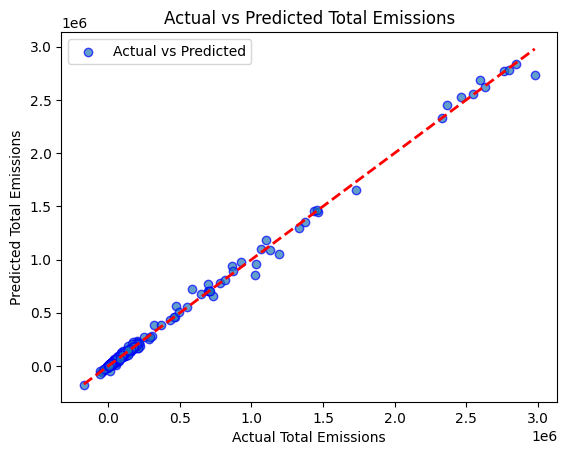

In [182]:
# Plot the results
plt.scatter(y_test, y_pred_stack, alpha=0.7, edgecolors='b', label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color = "red")  # Plot the diagonal line
plt.xlabel('Actual Total Emissions')
plt.ylabel('Predicted Total Emissions')
plt.title('Actual vs Predicted Total Emissions')
plt.legend()
plt.show()

                        Feature  Importance
12       Manure_left_on_Pasture    0.648956
10               Food_Packaging    0.116974
3              Rice_Cultivation    0.083839
6                Food_Transport    0.072524
8         Net_Forest_conversion    0.044711
7                    Forestland    0.020188
13       Fires_in_organic_soils    0.006387
4   Drained_organic_soils_(CO2)    0.001634
2                  Forest_fires    0.001306
5      Pesticides_Manufacturing    0.001202
11              Food_Processing    0.000899
1                 Savanna_fires    0.000583
9                   Food_Retail    0.000370
0                          Year    0.000170
14           On-farm_energy_use    0.000136


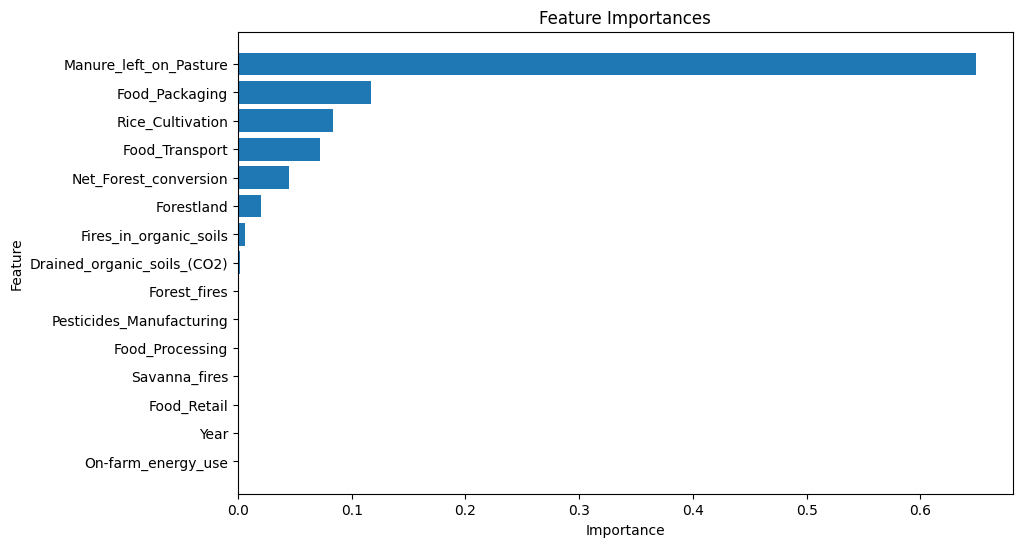

In [183]:
# Extract feature importances if available
importances_list = []
for name, estimator in final_model_stack.named_estimators_.items():
    last_step = list(estimator.named_steps.values())[-1]
    if hasattr(last_step, 'feature_importances_'):
        importances_list.append(last_step.feature_importances_)

# If we have feature importances from any base estimators
if importances_list:
    # Average the feature importances
    importances = np.mean(importances_list, axis=0)

    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

    # Exclude features that start with 'area'
    feature_importances = feature_importances[~feature_importances['Feature'].str.startswith('Area')]

    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Print the feature importances
    print(feature_importances)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("None of the base estimators provide feature importances.")

Our Residual Plot shows no pattern, that is, the points are randomly dispersed,we can conclude that a linear model is an appropriate model.

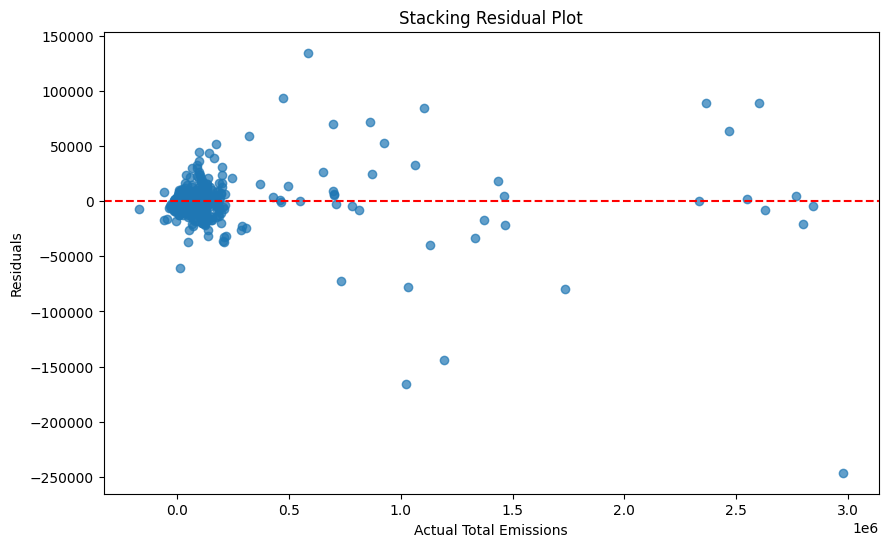

In [184]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack - y_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Total Emissions')
plt.ylabel('Residuals')
plt.title('Stacking Residual Plot')
plt.show()